In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
# pull data from files
try:
    ds            = xr.open_dataset('../data/master')
    ds_fixed      = ds.isel(model=[1, 2, 3, 4, 5, 8, 9, 12])
    ds_plev       = xr.open_dataset('../data/master_plev')
    ds_plev_fixed = ds_plev.isel(model=[1, 2, 3, 4, 5, 8, 9, 12])
except FileNotFoundError:
    !python loaddata.py

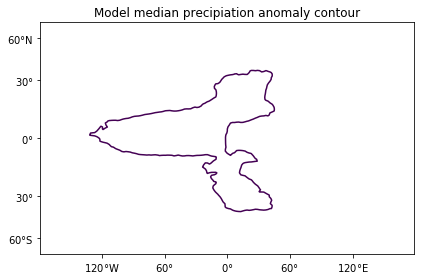

In [3]:
# generating tail contour for precipitation
var  = 'pr'
tm   = ds_fixed[var].mean(dim='time')
anom = tm.sel(exp='LandControl') - tm.sel(exp='AquaControl')
data = anom.median(dim='model')

ax = plt.subplot(1,1,1)
ax.set_xticks([-120, -60, 0, 60, 120])
ax.set_yticks([-.866, -.5, 0, .5, .866])

ax.set_title('Model median precipiation anomaly contour')
ax.xaxis.set_ticklabels(['120$\degree$W', '60$\degree$', '0$\degree$', '60$\degree$', '120$\degree$E'])
ax.yaxis.set_ticklabels(['60$\degree$S', '30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$N'])

c = plt.contour(ds_fixed.lon, np.sin(ds_fixed.lat * np.pi / 180.0), data, levels=[-0.53])

# nasty code to remove specific contour lines from plot
for level in c.collections:
    for kp,path in reversed(list(enumerate(level.get_paths()))):
        verts    = path.vertices
        diameter = np.max(verts.max(axis=0) - verts.min(axis=0))
        if diameter<100:
            del(level.get_paths()[kp])

plt.tight_layout()
plt.savefig('../figs/pr_contour.pdf')

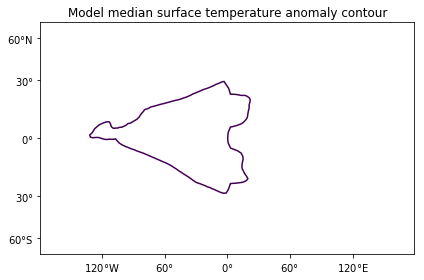

In [4]:
# generating tail contour for surface temperature
var  = 'ts'
tm   = ds_fixed[var].mean(dim='time')
anom = tm.sel(exp='LandControl') - tm.sel(exp='AquaControl')
data = anom.median(dim='model')

ax = plt.subplot(1,1,1)
ax.set_xticks([-120, -60, 0, 60, 120])
ax.set_yticks([-.866, -.5, 0, .5, .866])

ax.set_title('Model median surface temperature anomaly contour')
ax.xaxis.set_ticklabels(['120$\degree$W', '60$\degree$', '0$\degree$', '60$\degree$', '120$\degree$E'])
ax.yaxis.set_ticklabels(['60$\degree$S', '30$\degree$', '0$\degree$', '30$\degree$', '60$\degree$N'])

c = plt.contour(ds_fixed.lon, np.sin(ds_fixed.lat * np.pi / 180.0), data, levels=[-0.5])

# nasty code to remove specific contour lines from plot
for level in c.collections:
    for kp,path in reversed(list(enumerate(level.get_paths()))):
        verts    = path.vertices
        diameter = np.max(verts.max(axis=0) - verts.min(axis=0))
        if diameter<150 or diameter>200:
            del(level.get_paths()[kp])

plt.tight_layout()
plt.savefig('../figs/ts_contour.pdf')

In [ ]:
data = anom.isel(model=[0,1,2]).median(dim='model')

ax = plt.subplot(1,2,1)
ax.add_patch(Rectangle((0, -30), 45, 60, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))
ax.set_title('Albedo anomalies: CAM3, CAM4, CNRM')
ax.set_xticks([-120, -60, 0, 60, 120])
ax.xaxis.set_ticklabels(['120$\degree$W', '60$\degree$', '0$\degree$',
                         '60$\degree$', '120$\degree$E'])
ax.set_yticks([-60, -30, 0, 30, 60])
ax.yaxis.set_ticklabels(['60$\degree$S', '30$\degree$', '0$\degree$',
                         '30$\degree$', '60$\degree$N'])
c = plt.contourf(anom.lon, anom.lat, data, levels=np.linspace(-2.4e-8,2.4e-8,13), extend='both', cmap='RdBu')
cbar = plt.colorbar(c)
cbar.set_label('$\Delta$%')

data = anom.isel(model=[3,4,5,6]).median(dim='model')

ax = plt.subplot(1,2,2)
ax.add_patch(Rectangle((0, -30), 45, 60, alpha=1, facecolor='none',
                                   edgecolor='black', linewidth=1))
ax.set_title('Albedo anomalies: ECHAM-6.1, MIROC5, MPAS, NorESM2')
ax.set_xticks([-120, -60, 0, 60, 120])
ax.xaxis.set_ticklabels(['120$\degree$W', '60$\degree$', '0$\degree$',
                         '60$\degree$', '120$\degree$E'])
ax.set_yticks([-60, -30, 0, 30, 60])
ax.yaxis.set_ticklabels(['60$\degree$S', '30$\degree$', '0$\degree$',
                         '30$\degree$', '60$\degree$N'])
c = plt.contourf(anom.lon, anom.lat, data, levels=np.linspace(-.0012,.0012,13), extend='both', cmap='RdBu')
cbar = plt.colorbar(c)
cbar.set_label('$\Delta$%')

fig = plt.gcf()
fig.set_size_inches(12.8, 4.8)

plt.tight_layout()

plt.savefig('figs/fig', dpi=1200)